In [2]:
import pandas as pd
data = pd.read_csv('preprocess.csv',
                  encoding ='ISO-8859-1')
data_scrub = data.dropna()

In [4]:
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import numpy as np
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data_scrub['text_pp'])
Y=X.toarray()
model = AC(12,linkage='complete')
model.fit(Y)
labels = model.labels_
counts = np.bincount(labels[labels>=0])
print(counts)
#plt.scatter(X[:,0],X[:,1], labels, cmap='rainbow')

[144  93 633 868 277 521 260 334 562 395  66  65]


In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

%matplotlib 
iris = load_iris()
x = iris.data[:20]
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)

plt.show()

In [15]:
print ('ward, euclidean')

ward = AC(n_clusters=12, linkage='ward', affinity='euclidean')

#ward = AgglomerativeClustering(n_clusters=10, linkage='ward', affinity='euclidean')

ward.fit(Y)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
#print ('silhouette', silhouette_score(data_scrub['text_pp'], ward.labels_))

ward, euclidean
labels {0: 50, 1: 2971, 2: 126, 3: 582, 4: 61, 5: 78, 6: 43, 7: 76, 8: 15, 9: 29, 10: 124, 11: 63}


In [16]:
print ('average linkage, euclidean')
average_linkage = AC(n_clusters=12, linkage='average', affinity='euclidean')
average_linkage.fit(Y)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
#print ('silhouette', silhouette_score(train_data, average_linkage.labels_))

average linkage, euclidean
labels {0: 3946, 1: 41, 2: 9, 3: 4, 4: 141, 5: 6, 6: 24, 7: 1, 8: 28, 9: 2, 10: 15, 11: 1}


In [17]:
print ('complete linkage, euclidean')
complete_linkage = AC(n_clusters=12, linkage='complete', affinity='euclidean')
complete_linkage.fit(Y)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
#print ('silhouette', silhouette_score(train_data, complete_linkage.labels_))

complete linkage, euclidean
labels {0: 144, 1: 93, 2: 633, 3: 868, 4: 277, 5: 521, 6: 260, 7: 334, 8: 562, 9: 395, 10: 66, 11: 65}


In [18]:
print ('average linkage, manhattan')
average_linkage = AC(n_clusters=12, linkage='average', affinity='manhattan')
average_linkage.fit(Y)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
#print ('silhouette', silhouette_score(train_data, average_linkage.labels_))

average linkage, manhattan
labels {0: 4206, 1: 2, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1}


In [20]:
print ('complete linkage, manhattan')
complete_linkage = AC(n_clusters=10, linkage='complete', affinity='manhattan')
                                              
complete_linkage.fit(Y)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
#print ('silhouette', silhouette_score(train_data, complete_linkage.labels_))

complete linkage, manhattan
labels {0: 3441, 1: 101, 2: 21, 3: 13, 4: 423, 5: 91, 6: 3, 7: 113, 8: 6, 9: 6}


In [21]:
len(set(average_linkage.labels_))

12

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
Z = linkage(Y, 'ward')

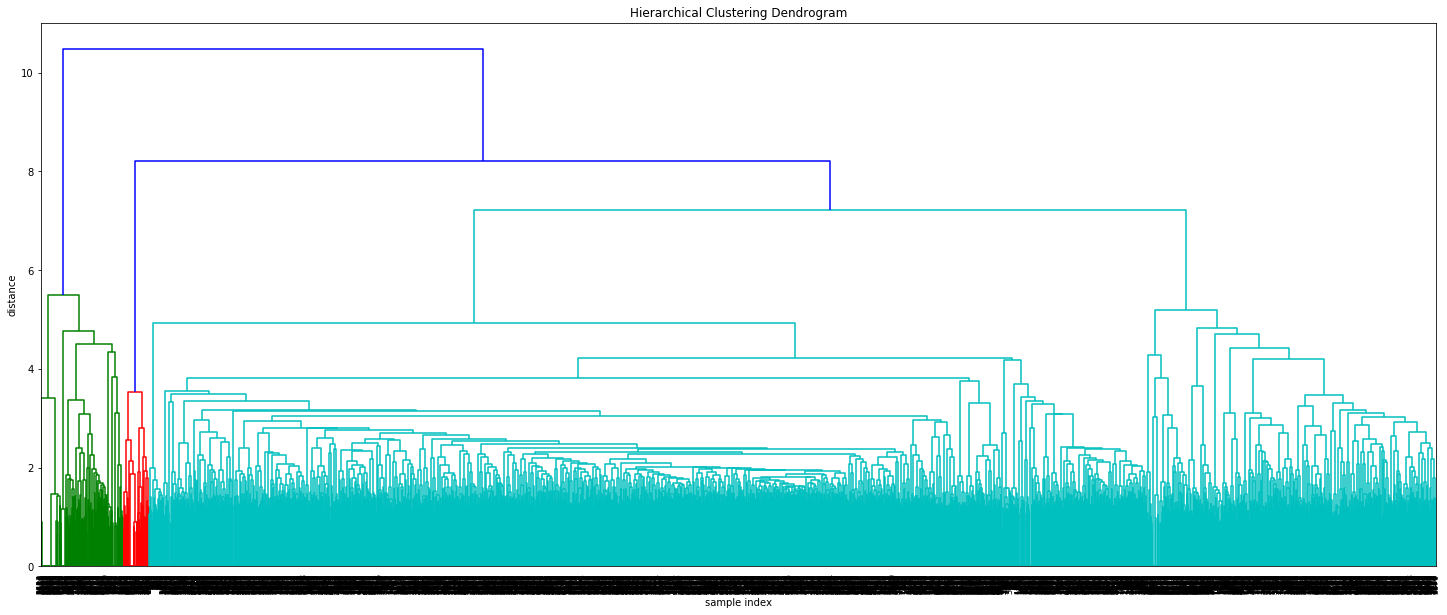

In [25]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [28]:
Z1 = linkage(Y, 'average')

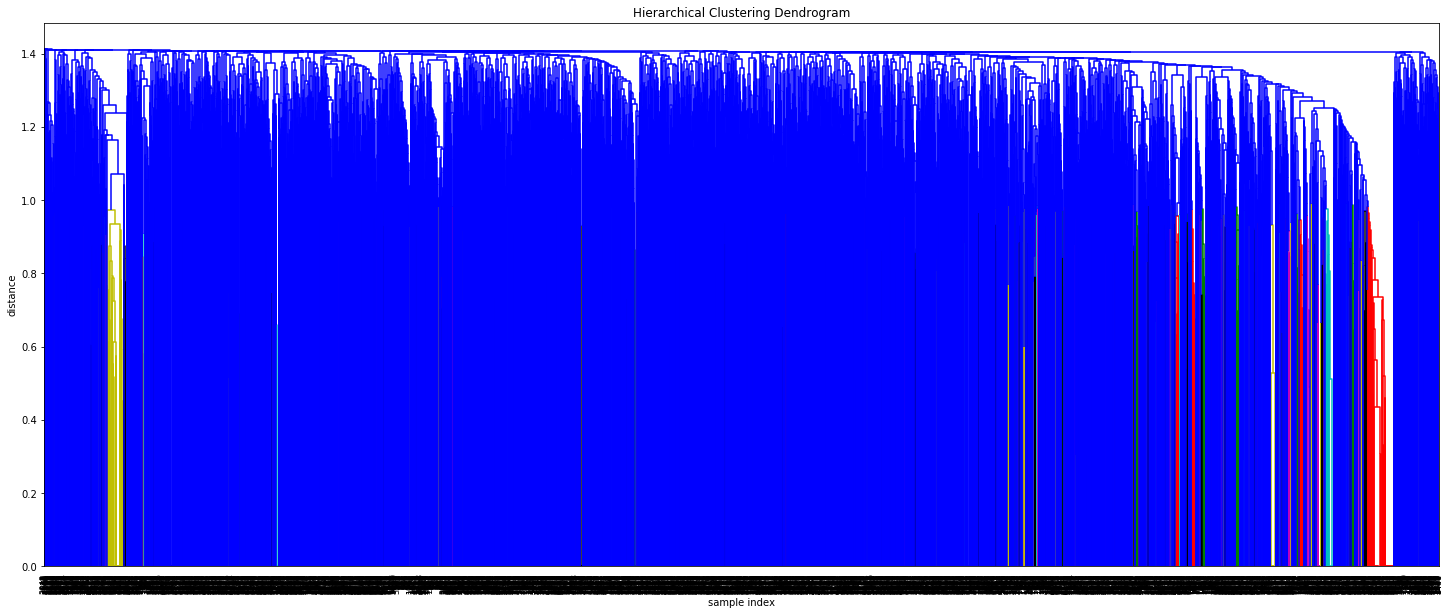

In [29]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z1,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [30]:
Z2 = linkage(Y, 'complete')

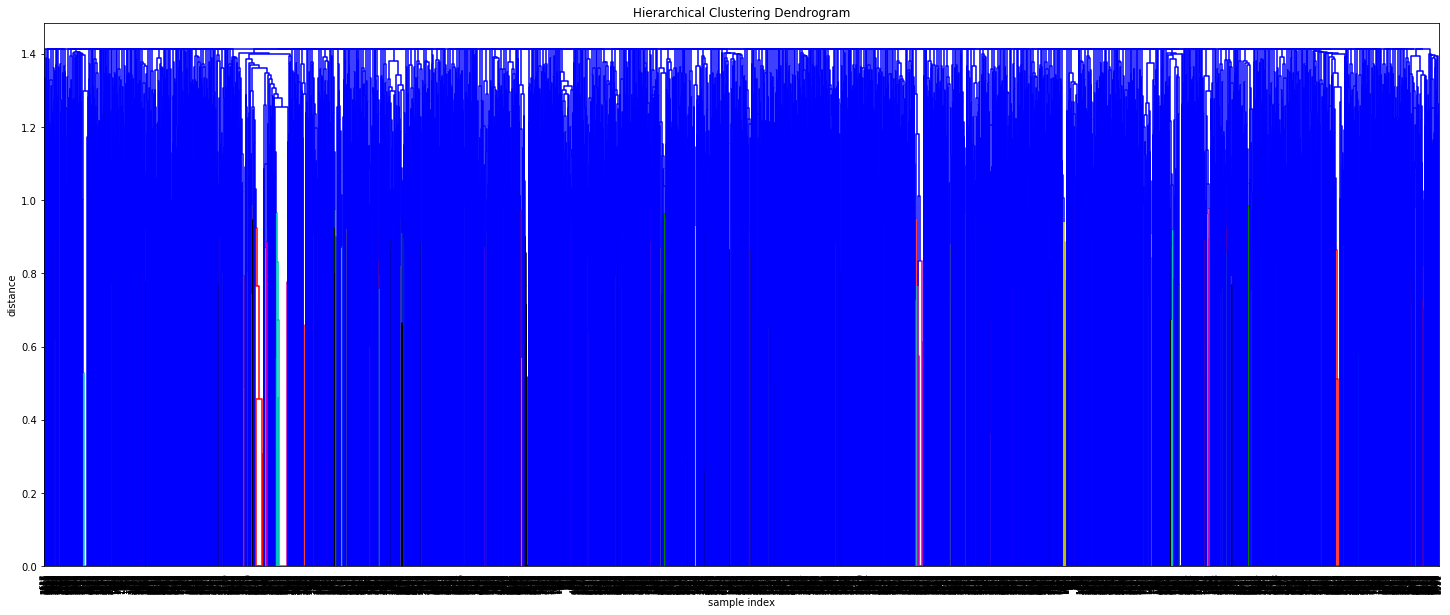

In [31]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z2,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [32]:
data_scrub_hc = data_scrub.copy()
data_scrub_hc['label_hc'] = ward.labels_
data_scrub_hc.head()

,Unnamed: 0,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,label_hc
0,0,2016-12-30 22:18:18,84254,814958820980039680,False,23213,Twitter for Android,Russians are playing @CNN and @NBCNews for suc...,russian playing fool funny watch clue totally get,1
1,1,2016-12-30 19:46:55,25336,814920722208296960,False,7366,Twitter for iPhone,"Join @AmerIcan32, founded by Hall of Fame lege...",join founded hall fame legend washington dc â,1
2,2,2016-12-30 19:41:33,97669,814919370711461888,False,34415,Twitter for Android,Great move on delay (by V. Putin) - I always k...,great move delay v putin always knew smart,1
3,3,2016-12-29 14:54:21,45609,814484710025994240,False,11330,Twitter for iPhone,My Administration will follow two simple rules...,administration follow two simple rule,3
4,4,2016-12-28 22:06:28,51857,814231064847728640,False,13919,Twitter for iPhone,'Economists say Trump delivered hope' https://...,economist say trump delivered hope,1
